In [5]:
import gym
import minerl
import os
import logging
import time
import datetime
from PIL import Image
from IPython.display import display



In [6]:
folder = "./logs_minerl"
log_file = f'{folder}/debug_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S_%f")}.log'
if not os.path.exists(folder):
    os.makedirs(folder)
logging.basicConfig(level=getattr(logging, "DEBUG"),
                    handlers=[logging.FileHandler(log_file),
                              logging.StreamHandler()])


In [19]:
render=False
start_time = time.time()
# logging.basicConfig(level=logging.DEBUG)

env = gym.make('MineRLBasaltFindCave-v0')
print(f"gym make {time.time() - start_time}")
# Note that this command will launch the MineRL environment, which takes time.
# Be patient!
obs = env.reset()
print(f"env.reset {time.time() - start_time}")

done = False

INFO:minerl.env.malmo.instance.0017ec:Starting Minecraft process: ['/home/dotan/projects/minerl2024/venv/lib/python3.10/site-packages/minerl/env/../MCP-Reborn/launchClient.sh', '-port', '11232', '-env', '-runDir', '/home/dotan/projects/minerl2024/venv/lib/python3.10/site-packages/minerl/env/../MCP-Reborn/run']
INFO:process_watcher:Launching process watcher daemonizer.


gym make 0.004065036773681641


/home/dotan/pythons/miniconda3_10/lib/python3.10/runpy.py:126: RuntimeWarning: 'minerl.utils.process_watcher' found in sys.modules after import of package 'minerl.utils', but prior to execution of 'minerl.utils.process_watcher'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
INFO:process_watcher:Process watcher daemonizer launched successfully.
DEBUG:minerl.env.malmo.instance.0017ec:/home/dotan/projects/minerl2024/venv/lib/python3.10/site-packages/minerl/env/../MCP-Reborn
DEBUG:minerl.env.malmo.instance.0017ec:SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
DEBUG:minerl.env.malmo.instance.0017ec:SLF4J: Defaulting to no-operation (NOP) logger implementation
DEBUG:minerl.env.malmo.instance.0017ec:SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.
DEBUG:minerl.env.malmo.instance.0017ec:[23:08:02] [Render thread/INFO]: Environment: authHost='https://authserver.mojang.com', accountsHost='https://api.mojang.com', sessio

env.reset 22.489381313323975


In [20]:
render=True
i = 0
start_loop = time.time()
for i in range(10):
    if i % 100 == 0:
        print(f"{i} => {time.time() - start_time} average={(time.time() - start_loop) / (i + 1)} ")

    # Take a random action
    action = env.action_space.sample()
    # In BASALT environments, sending ESC action will end the episode
    # Lets not do that
    action["ESC"] = 0
    obs, reward, done, _ = env.step(action)
    if render:
        pass
        # env.render()
    i = i + 1
    if done:
        break

0 => 22.495363473892212 average=6.461143493652344e-05 


In [12]:
obs["pov"].shape

(360, 640, 3)

In [22]:
from IPython.display import display
display(obs["pov"])

array([[[ 26,  51,  71],
        [ 26,  51,  71],
        [ 26,  51,  71],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 26,  51,  71],
        [ 26,  51,  71],
        [ 26,  51,  71],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 27,  51,  71],
        [ 27,  51,  71],
        [ 27,  51,  71],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 29,  52,  73],
        [ 29,  52,  73],
        [ 29,  52,  74],
        ...,
        [ 25, 118, 210],
        [ 25, 118, 210],
        [ 25, 118, 210]],

       [[ 29,  52,  73],
        [ 29,  52,  73],
        [ 29,  53,  74],
        ...,
        [ 25, 118, 210],
        [ 25, 118, 210],
        [ 25, 118, 210]],

       [[ 29,  52,  73],
        [ 29,  52,  73],
        [ 29,  53,  73],
        ...,
        [ 25, 118, 210],
        [ 25, 118, 210],
        [ 25, 118, 210]]

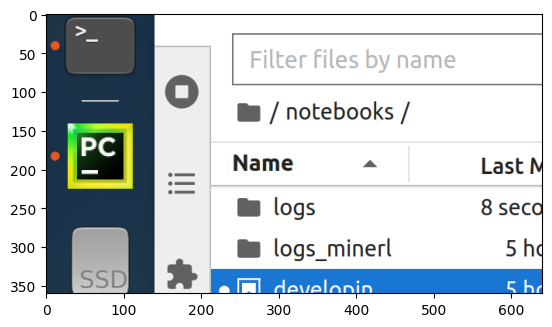

In [21]:
from matplotlib import pyplot as plt
from matplotlib import image
plt.imshow(obs["pov"])
plt.show()